<a href="https://colab.research.google.com/github/pmama/DeepLearningConcepts/blob/main/SinglePerceptron_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

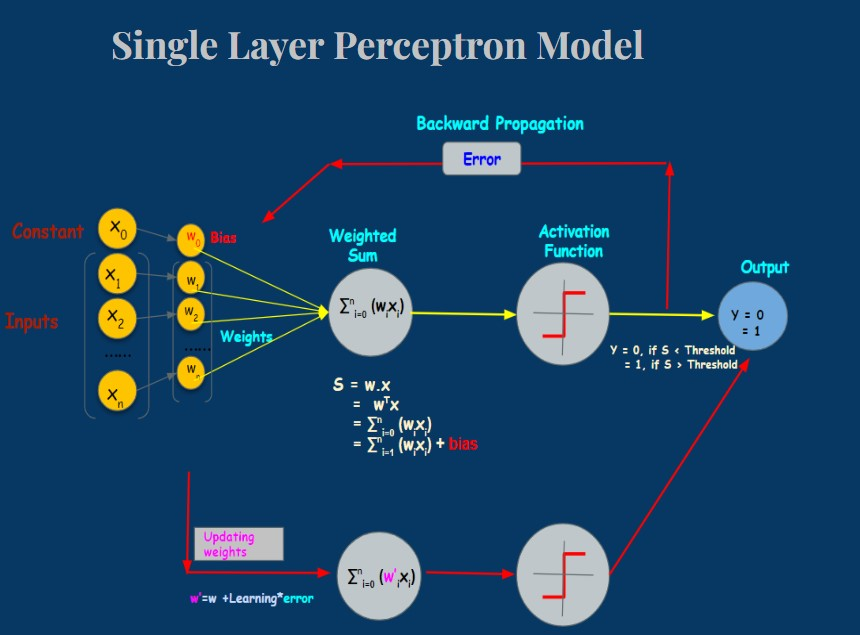

# **Single Layer Perceptron Model**
- Supervised learning algorithm
- For Binary classifier
- Suitable for linearly separable dataset

# **Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Creating DataFrame

In [2]:
data={'x1':[0,0,1,1],
      'x2':[0,1,0,1],
      'AND':[0,0,0,1],
      'OR':[0,1,1,1],
      'XOR':[0,1,1,0] }
data

{'x1': [0, 0, 1, 1],
 'x2': [0, 1, 0, 1],
 'AND': [0, 0, 0, 1],
 'OR': [0, 1, 1, 1],
 'XOR': [0, 1, 1, 0]}

In [3]:
df = pd.DataFrame(data)
df

,x1,x2,AND,OR,XOR
0,0,0,0,0,0
1,0,1,0,1,1
2,1,0,0,1,1
3,1,1,1,1,0


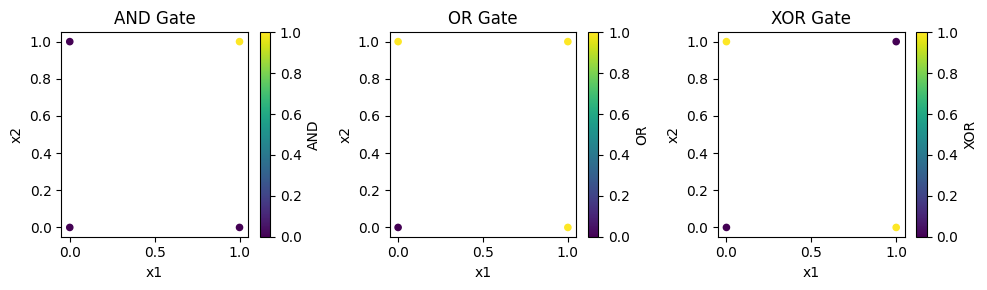

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
df.plot.scatter(x='x1', y='x2', c='AND', colormap='viridis', ax=axes[0])
axes[0].set_title('AND Gate')


df.plot.scatter(x='x1', y='x2', c='OR', colormap='viridis', ax=axes[1])
axes[1].set_title('OR Gate')

# Plot XOR gate
df.plot.scatter(x='x1', y='x2', c='XOR', colormap='viridis', ax=axes[2])
axes[2].set_title('XOR Gate')

# Show the plots
plt.tight_layout()
plt.show()

In [5]:
# Create 3D scatter plots using Plotly
import plotly.express as px
fig = px.scatter_3d(df, x='x1', y='x2', z='AND', color='AND', title='AND Gate 3D Plot')
fig.update_traces(marker=dict(size=12))
fig.show()

fig = px.scatter_3d(df, x='x1', y='x2', z='OR', color='OR', title='OR Gate 3D Plot')
fig.update_traces(marker=dict(size=12))
fig.show()

fig = px.scatter_3d(df, x='x1', y='x2', z='XOR', color='XOR', title='XOR Gate 3D Plot')
fig.update_traces(marker=dict(size=12))
fig.show()

#-  `AND`, `OR` are **linearly separable**
#- whereas `XOR` is not ***linearly separable***

In [6]:
df_AND= df[['x1','x2','AND']]
df_AND

,x1,x2,AND
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [7]:
df_OR= df[['x1','x2','OR']]
df_OR

,x1,x2,OR
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [8]:
df_XOR= df[['x1','x2','XOR']]
df_XOR

,x1,x2,XOR
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


# Splitting into predictors and response variable

In [9]:
x = df[['x1','x2']]
y_AND= df['AND']
y_OR= df['OR']
y_XOR = df['XOR']


In [10]:
x

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [11]:
print('y  values for AND Gate:' ,y_AND.values)
print('y values for OR Gate:' ,y_OR.values)
print('y values for XOR Gate:' ,y_XOR.values)

y  values for AND Gate: [0 0 0 1]
y values for OR Gate: [0 1 1 1]
y values for XOR Gate: [0 1 1 0]


# **AND GATE- Perceptron Model**

In [12]:
y= y_AND
y

0    0
1    0
2    0
3    1
Name: AND, dtype: int64

### **Step-1 Initialising weight randomly**
**wt =[0.9,0.7]**

In [13]:
# initialising weight
wt =[0.9,0.7]
wt

[0.9, 0.7]

### **Step-2 Summing and setting Threshold**

In [14]:
# Setting Threshold
th =0.5
th

0.5

In [15]:


for i in range(len(df)):
  instances =x.loc[i]
  x0 =instances[0]
  x1 =instances[1]
  sum = x0*wt[0]+x1*wt[1]
  if sum >th:
    y_pred = 1
  else:
    y_pred = 0
  error = y[i] - y_pred
  print('Predicted value is', y_pred, 'Actual value is', y[i], "(error", error,")")

Predicted value is 0 Actual value is 0 (error 0 )
Predicted value is 1 Actual value is 0 (error -1 )
Predicted value is 1 Actual value is 0 (error -1 )
Predicted value is 1 Actual value is 1 (error 0 )


### **Step 3: Learning From Error through updating the weights**
## - `#Epoch = #(BackPropagation + FrontPropagation)`
- "one epoch is counted when the data set has done both forward and backward passes."
- ### **Updating Weights : $ w_{new} = w_{old} + \alpha * Error$**
> where,
> - $\alpha$ = Learning Rate
> - Error = observed - actual = $ ( (\hat y)-y)$

In [16]:
# let' modify the weight with learning rate and error
# w_new = w_old + learning_rate * error
y= y_AND
alpha = 0.1
epoch = 20
for j in range(epoch):
  print('epoch', j)
  for i in range(len(df)):
    instances =x.loc[i]
    x0 =instances[0]
    x1 =instances[1]
    sum = x0*wt[0]+x1*wt[1]
    if sum >th:
      y_pred = 1
    else:
      y_pred = 0
    error = y[i]-y_pred
    print('Predicted value is', y_pred, 'Actual value is', y[i], "(error", error,")")
    wt[0]= wt[0] + alpha * error
    wt[1]= wt[1] + alpha * error

  print('----'*25)


epoch 0
Predicted value is 0 Actual value is 0 (error 0 )
Predicted value is 1 Actual value is 0 (error -1 )
Predicted value is 1 Actual value is 0 (error -1 )
Predicted value is 1 Actual value is 1 (error 0 )
----------------------------------------------------------------------------------------------------
epoch 1
Predicted value is 0 Actual value is 0 (error 0 )
Predicted value is 0 Actual value is 0 (error 0 )
Predicted value is 1 Actual value is 0 (error -1 )
Predicted value is 1 Actual value is 1 (error 0 )
----------------------------------------------------------------------------------------------------
epoch 2
Predicted value is 0 Actual value is 0 (error 0 )
Predicted value is 0 Actual value is 0 (error 0 )
Predicted value is 1 Actual value is 0 (error -1 )
Predicted value is 1 Actual value is 1 (error 0 )
----------------------------------------------------------------------------------------------------
epoch 3
Predicted value is 0 Actual value is 0 (error 0 )
Predicted v

In [17]:
wt

[0.40000000000000013, 0.20000000000000004]

# **OR GATE- Perceptron Model**

In [18]:
y= y_OR
y

0    0
1    1
2    1
3    1
Name: OR, dtype: int64

In [19]:
# initialising weights
wt= [0.9,0.8]
wt

[0.9, 0.8]

In [20]:
for i in range(len(df)):
  instances =x.loc[i]
  x0 =instances[0]
  x1 =instances[1]
  sum = x0*wt[0]+x1*wt[1]
  if sum >th:
    y_pred = 1
  else:
    y_pred = 0
  error = y[i] - y_pred
  print('Predicted value is', y_pred, 'Actual value is', y[i], "(error", error,")")

Predicted value is 0 Actual value is 0 (error 0 )
Predicted value is 1 Actual value is 1 (error 0 )
Predicted value is 1 Actual value is 1 (error 0 )
Predicted value is 1 Actual value is 1 (error 0 )


In [21]:

wt=[0.1,0.1]

# let' modify the weight with learning rate and error
# w_new = w_old + learning_rate * error
alpha = 0.1
epoch = 20
for j in range(epoch):
  print('epoch', j)
  for i in range(len(df)):
    instances =x.loc[i]
    x0 =instances[0]
    x1 =instances[1]
    sum = x0*wt[0]+x1*wt[1]
    if sum >th:
      y_pred = 1
    else:
      y_pred = 0
    error = y[i]-y_pred
    print('Predicted value is', y_pred, 'Actual value is', y[i], "(error", error,")")
    wt[0]= wt[0] + alpha * error
    wt[1]= wt[1] + alpha * error

  print('----'*25)

epoch 0
Predicted value is 0 Actual value is 0 (error 0 )
Predicted value is 0 Actual value is 1 (error 1 )
Predicted value is 0 Actual value is 1 (error 1 )
Predicted value is 1 Actual value is 1 (error 0 )
----------------------------------------------------------------------------------------------------
epoch 1
Predicted value is 0 Actual value is 0 (error 0 )
Predicted value is 0 Actual value is 1 (error 1 )
Predicted value is 0 Actual value is 1 (error 1 )
Predicted value is 1 Actual value is 1 (error 0 )
----------------------------------------------------------------------------------------------------
epoch 2
Predicted value is 0 Actual value is 0 (error 0 )
Predicted value is 0 Actual value is 1 (error 1 )
Predicted value is 1 Actual value is 1 (error 0 )
Predicted value is 1 Actual value is 1 (error 0 )
----------------------------------------------------------------------------------------------------
epoch 3
Predicted value is 0 Actual value is 0 (error 0 )
Predicted value

In [22]:
wt

[0.6, 0.6]

# **XOR GATE- Perceptron Model**

In [23]:
y= y_XOR
y

0    0
1    1
2    1
3    0
Name: XOR, dtype: int64

In [24]:
# initialising weights
wt= [0.9,0.8]
wt

[0.9, 0.8]

In [25]:

for i in range(len(df)):
  instances =x.loc[i]
  x0 =instances[0]
  x1 =instances[1]
  sum = x0*wt[0]+x1*wt[1]
  if sum >th:
    y_pred = 1
  else:
    y_pred = 0
  error = y[i] - y_pred
  print('Predicted value is', y_pred, 'Actual value is', y[i], "(error", error,")")

Predicted value is 0 Actual value is 0 (error 0 )
Predicted value is 1 Actual value is 1 (error 0 )
Predicted value is 1 Actual value is 1 (error 0 )
Predicted value is 1 Actual value is 0 (error -1 )


In [26]:
# let' modify the weight with learning rate and error
# w_new = w_old + learning_rate * error

alpha = 0.1
epoch = 100
for j in range(epoch):
  print('epoch', j)
  for i in range(len(df)):
    instances =x.loc[i]
    x0 =instances[0]
    x1 =instances[1]
    sum = x0*wt[0]+x1*wt[1]
    if sum >th:
      y_pred = 1
    else:
      y_pred = 0
    error = y[i]-y_pred
    print('Predicted value is', y_pred, 'Actual value is', y[i], "(error", error,")")
    wt[0]= wt[0] + alpha * error
    wt[1]= wt[1] + alpha * error

  print('----'*25)

epoch 0
Predicted value is 0 Actual value is 0 (error 0 )
Predicted value is 1 Actual value is 1 (error 0 )
Predicted value is 1 Actual value is 1 (error 0 )
Predicted value is 1 Actual value is 0 (error -1 )
----------------------------------------------------------------------------------------------------
epoch 1
Predicted value is 0 Actual value is 0 (error 0 )
Predicted value is 1 Actual value is 1 (error 0 )
Predicted value is 1 Actual value is 1 (error 0 )
Predicted value is 1 Actual value is 0 (error -1 )
----------------------------------------------------------------------------------------------------
epoch 2
Predicted value is 0 Actual value is 0 (error 0 )
Predicted value is 1 Actual value is 1 (error 0 )
Predicted value is 1 Actual value is 1 (error 0 )
Predicted value is 1 Actual value is 0 (error -1 )
----------------------------------------------------------------------------------------------------
epoch 3
Predicted value is 0 Actual value is 0 (error 0 )
Predicted va

In [27]:
wt

[0.5000000000000001, 0.40000000000000013]

- ### **Perceptron model failed to update XOR data**

# **Building TensorFlow.Keras Model for AND, OR, XOR**

```



In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import accuracy_score

In [29]:
model = Sequential()
model.add(Dense(input_shape=(2,), units=1, activation ='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# AND

In [30]:
model.compile(optimizer =SGD(learning_rate =0.5), loss='binary_crossentropy', metrics =['accuracy'])
model.fit(x,y_AND, epochs =100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.8890 - accuracy: 0.7500
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 0.8633 - accuracy: 0.7500
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 0.8393 - accuracy: 0.7500
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 0.8169 - accuracy: 0.7500
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 0.7958 - accuracy: 0.7500
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 0.7761 - accuracy: 0.7500
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 0.7574 - accuracy: 0.7500
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 0.7397 - accuracy: 0.7500
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 0.7229 - accuracy: 0.7500
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 0.7069 - accuracy: 0.7500
Epoch 11/100
1/1 [===

In [31]:
y_pred_AND = model.predict(x)
y_pred_AND =(y_pred_AND>th)
print(y_pred_AND)
print("accuracy in AND GATE :", accuracy_score(y_pred_AND, y_AND))

print(model.evaluate(x,y_AND))


1/1 [==============================] - 0s 172ms/step
[[False]
 [False]
 [False]
 [ True]]
accuracy in AND GATE : 1.0
1/1 [==============================] - 0s 334ms/step - loss: 0.2471 - accuracy: 1.0000
[0.24712136387825012, 1.0]


# OR

In [32]:
# For OR GATE
model.fit(x,y_OR, epochs =100)

Epoch 1/100
1/1 [==============================] - 0s 16ms/step - loss: 0.8518 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 0.6822 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 0.5587 - accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 0.4679 - accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 0.4002 - accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 0.3490 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 30ms/step - loss: 0.3098 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 0.2792 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 0.2552 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 0.2359 - accuracy: 1.0000
Epoch 11/100
1/1 [=

In [33]:
y_pred_OR = model.predict(x)
y_pred_OR =(y_pred_OR>th)
print(y_pred_OR)

print("accuracy in OR GATE :", accuracy_score(y_pred_OR, y_OR))

1/1 [==============================] - 0s 44ms/step
[[False]
 [ True]
 [ True]
 [ True]]
accuracy in OR GATE : 1.0


# XOR

In [34]:
# For XOR GATE
model.fit(x,y_XOR, epochs =100)


Epoch 1/100
1/1 [==============================] - 0s 51ms/step - loss: 1.7202 - accuracy: 0.7500
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 1.6345 - accuracy: 0.7500
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 1.5548 - accuracy: 0.7500
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 1.4812 - accuracy: 0.7500
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 1.4142 - accuracy: 0.7500
Epoch 6/100
1/1 [==============================] - 0s 31ms/step - loss: 1.3538 - accuracy: 0.7500
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 1.3001 - accuracy: 0.7500
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 1.2527 - accuracy: 0.7500
Epoch 9/100
1/1 [==============================] - 0s 21ms/step - loss: 1.2113 - accuracy: 0.7500
Epoch 10/100
1/1 [==============================] - 0s 24ms/step - loss: 1.1754 - accuracy: 0.7500
Epoch 11/100
1/1 [=

In [35]:
y_pred_XOR = model.predict(x)
y_pred_XOR =(y_pred_XOR>th)
print(y_pred_OR)

print("accuracy in XOR GATE :", accuracy_score(y_pred_XOR, y_XOR))

1/1 [==============================] - 0s 74ms/step
[[False]
 [ True]
 [ True]
 [ True]]
accuracy in XOR GATE : 0.25


# **Summary of single layer perceptron model on AND, OR, XOR Gate :**

In [36]:
print("accuracy in AND GATE :", accuracy_score(y_pred_AND, y_AND))
print("accuracy in OR GATE :", accuracy_score(y_pred_OR, y_OR))
print("accuracy in XOR GATE :", accuracy_score(y_pred_XOR, y_XOR))

accuracy in AND GATE : 1.0
accuracy in OR GATE : 1.0
accuracy in XOR GATE : 0.25


###  => ***Single Layer Perceptron model doesn't work for the XOR gate (non-linear dataset).***

# Multi Layer Perceptron(MLP) for XOR gate:

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [38]:


mlp = Sequential()
mlp.add(Dense(4, input_dim= 2, activation ='relu',))#
mlp.add( Dense(1, activation='sigmoid'))# Output
# Compiling
mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Training
mlp.fit(x, y_XOR, epochs=1000, verbose=0)
y_pred_mlp = mlp.predict(x)
# Evaluating
loss, accuracy = model.evaluate(x, y_XOR)
print(f"Loss: {loss}, Accuracy: {accuracy * 100:.2f}%")


1/1 [==============================] - 0s 27ms/step - loss: 0.7153 - accuracy: 0.2500
Loss: 0.715255618095398, Accuracy: 25.00%


In [39]:
y_pred_mlp =(y_pred_mlp>th)
print(y_pred_mlp)

print("accuracy in XOR GATE :", accuracy_score(y_pred_mlp, y_XOR))

[[False]
 [ True]
 [ True]
 [False]]
accuracy in XOR GATE : 1.0


- #### **Multi Layer Perceptron Could able to classify the XOR GATE data with 100% accuracy.**